In [1]:
# !pip install pandas matplotlib seaborn librosa wordcloud

In [2]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import librosa
import os
import numpy as np
from wordcloud import WordCloud
from google.colab import drive

In [3]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

In [4]:
print("Mounting Google Drive...")
drive.mount('/content/drive')

Mounting Google Drive...
Mounted at /content/drive


In [5]:
BASE_PATH = '/content/drive/MyDrive/deep-learning'

In [6]:
MELD_CSV_PATH = os.path.join(BASE_PATH, 'train_sent_emo.csv')
ECAC_JSON_PATH = os.path.join(BASE_PATH, 'Subtask_2_train.json')
AUDIO_FOLDER = os.path.join(BASE_PATH, 'train_splits')

In [7]:
df_text = pd.read_csv(MELD_CSV_PATH)
print(f"Text Data Loaded: {len(df_text)} utterances")

Text Data Loaded: 9989 utterances


In [8]:
with open(ECAC_JSON_PATH, 'r') as f:
    data_cause = json.load(f)
print(f"Cause Data Loaded: {len(data_cause)} conversations")

Cause Data Loaded: 1374 conversations


In [9]:
cause_pairs = []

for conv_data in data_cause:
    if isinstance(conv_data, dict):
        conv_id = conv_data.get('conversation_ID')

        if 'emotion-cause_pairs' in conv_data and isinstance(conv_data['emotion-cause_pairs'], list):
            for pair_str_list in conv_data['emotion-cause_pairs']:
                if len(pair_str_list) == 2:
                    try:

                        emotion_utterance_key = pair_str_list[0]
                        cause_utterance_key = pair_str_list[1]

                        emo_id = int(emotion_utterance_key.split('_')[0].replace('utt', ''))
                        cause_id = int(cause_utterance_key.split('_')[0].replace('utt', ''))

                        emotion_type = 'unknown'
                        if 'conversation' in conv_data and isinstance(conv_data['conversation'], list):
                            for utterance_data in conv_data['conversation']:

                                if utterance_data.get('utterance_ID') == emo_id:
                                    emotion_type = utterance_data.get('emotion', 'unknown')
                                    break

                        pair_data = {
                            'conv_id': conv_id,
                            'emotion_type': emotion_type,
                            'distance': emo_id - cause_id,
                            'emotion_id': emo_id,
                            'cause_id': cause_id
                        }
                        cause_pairs.append(pair_data)
                    except (ValueError, IndexError, KeyError):

                        continue

In [10]:
df_cause = pd.DataFrame(cause_pairs)

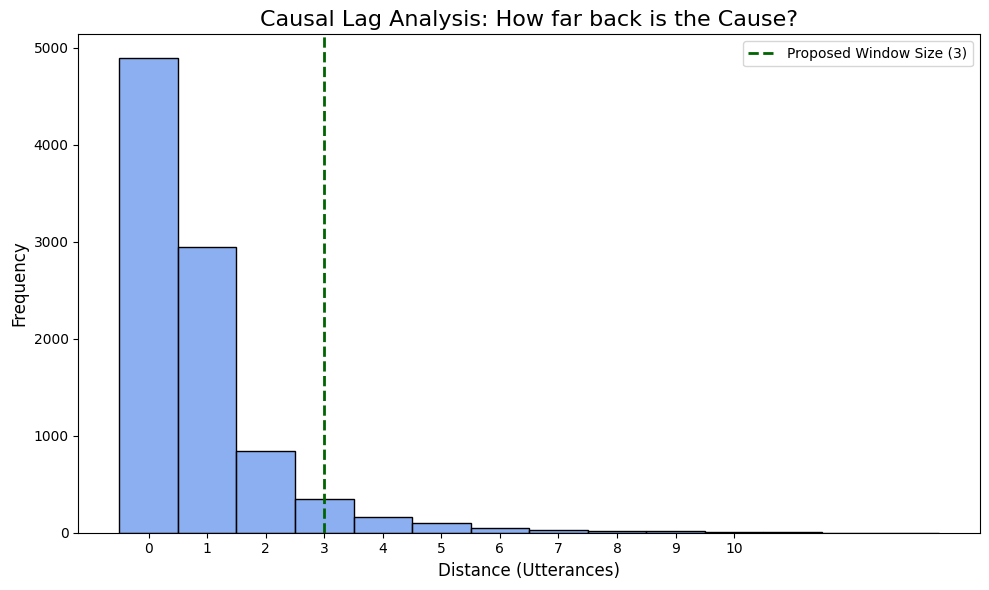

Avg Distance: 0.72 turns


In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(
    df_cause['distance'],
    bins=np.arange(0, 15) - 0.5,
    kde=False,
    color='cornflowerblue',
    edgecolor='black'
)

plt.title('Causal Lag Analysis: How far back is the Cause?', fontsize=16)
plt.xlabel('Distance (Utterances)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(range(0, 11))
plt.axvline(x=3, color='darkgreen', linestyle='--', linewidth=2,
            label='Proposed Window Size (3)')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Avg Distance: {df_cause['distance'].mean():.2f} turns")


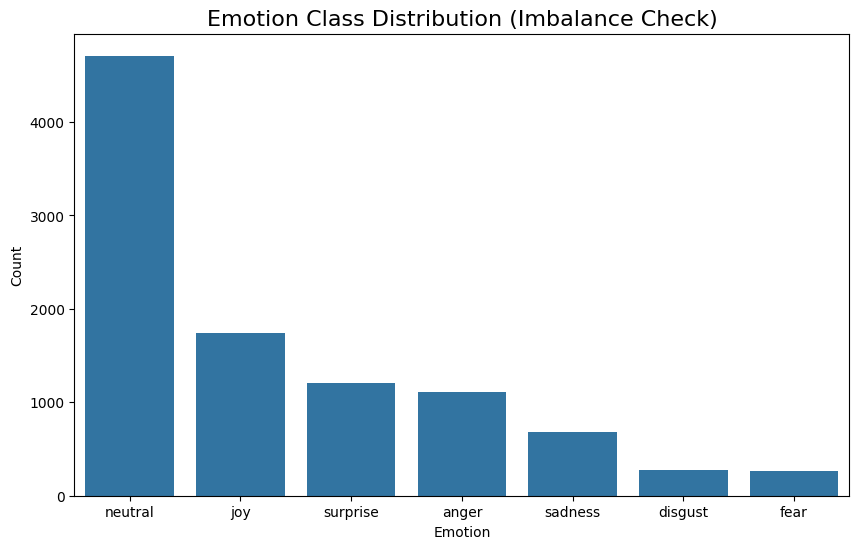

In [12]:
plt.figure(figsize=(10, 6))
order = df_text['Emotion'].value_counts().index
sns.countplot(data=df_text, x='Emotion', order=order)
plt.title('Emotion Class Distribution (Imbalance Check)', fontsize=16)
plt.ylabel('Count')
plt.show()

In [13]:
text_anger = " ".join(df_text[df_text['Emotion'] == 'anger']['Utterance'].astype(str))
wc = WordCloud(width=800, height=400, background_color='white').generate(text_anger)

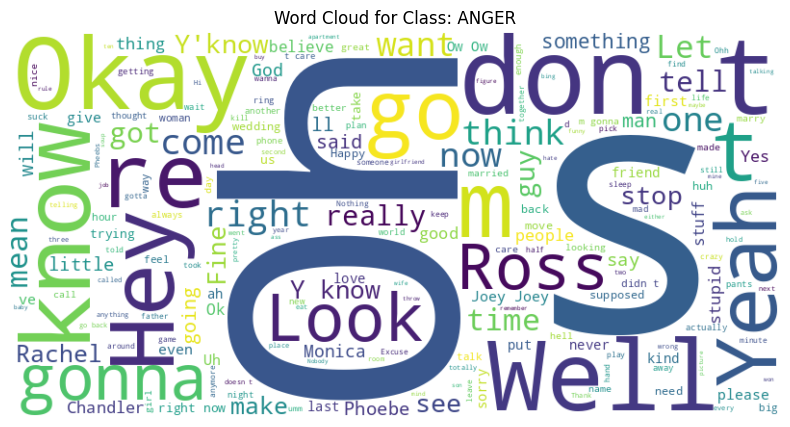

In [14]:
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Class: ANGER')
plt.show()

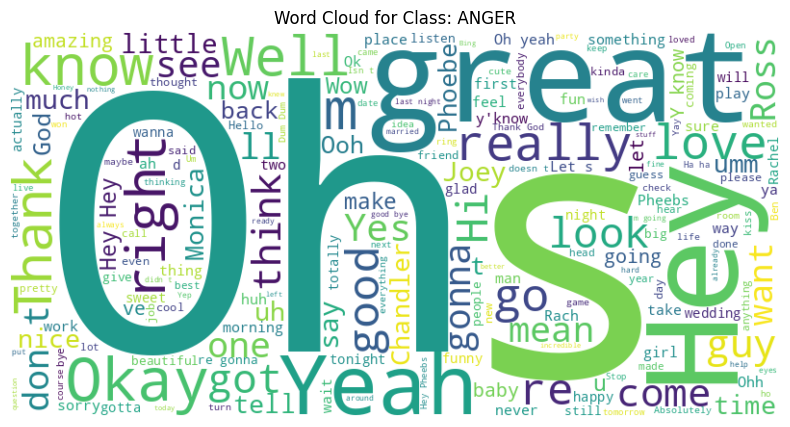

In [15]:
text_joy = " ".join(df_text[df_text['Emotion'] == 'joy']['Utterance'].astype(str))
wc = WordCloud(width=800, height=400, background_color='white').generate(text_joy)
plt.figure(figsize=(10, 5))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Class: ANGER')
plt.show()

In [16]:
# audio_durations = []
# missing_files = 0

# check_limit = 200
# counter = 0

# print(f"Checking Audio/Video files in {AUDIO_FOLDER}...")

In [17]:

# !apt-get install -y ffmpeg

# !pip install librosa soundfile --upgrade

In [18]:
# for index, row in df_text.iterrows():
#     if counter >= check_limit: break

#     filename = f"dia{row['Dialogue_ID']}_utt{row['Utterance_ID']}.mp4"
#     filepath = os.path.join(AUDIO_FOLDER, filename)

#     if os.path.exists(filepath):
#         try:

#             dur = librosa.get_duration(path=filepath)
#             audio_durations.append({'Emotion': row['Emotion'], 'Duration': dur})
#             counter += 1
#         except Exception as e:

#             pass
#     else:
#         missing_files += 1

In [19]:
# if len(audio_durations) > 0:
#     df_audio = pd.DataFrame(audio_durations)

#     plt.figure(figsize=(10, 6))
#     sns.boxplot(x='Emotion', y='Duration', data=df_audio)
#     plt.title('Audio Clip Duration Distribution by Emotion')
#     plt.ylabel('Duration (Seconds)')
#     plt.show()

#     print(f"Analyzed {len(df_audio)} audio files.")
# else:
#     print("Skipped Audio Plot: No audio files found in the specified path.")

# print(f"EDA Complete.")

In [20]:

# import numpy as np
# from tqdm import tqdm

# sampled_df = df_text.groupby('Emotion').apply(lambda x: x.sample(n=50, random_state=42)).reset_index(drop=True)

# audio_energies = []

# print(f"Analyzing Audio Energy for {len(sampled_df)} samples...")

# for index, row in tqdm(sampled_df.iterrows(), total=sampled_df.shape[0]):

#     filename = f"dia{row['Dialogue_ID']}_utt{row['Utterance_ID']}.mp4"
#     filepath = os.path.join(AUDIO_FOLDER, filename)

#     if os.path.exists(filepath):
#         try:

#             y, sr = librosa.load(filepath, sr=16000, duration=3.0)

#             rms = librosa.feature.rms(y=y)
#             avg_energy = np.mean(rms)

#             audio_energies.append({
#                 'Emotion': row['Emotion'],
#                 'Energy_RMS': avg_energy
#             })
#         except:
#             continue

# if len(audio_energies) > 0:
#     df_energy = pd.DataFrame(audio_energies)

#     plt.figure(figsize=(10, 6))

#     sns.boxplot(x='Emotion', y='Energy_RMS', data=df_energy, palette='magma', order=order)
#     plt.title('Cross-Modal Correlation: Audio Energy (Loudness) vs. Emotion')
#     plt.ylabel('Average RMS Energy')
#     plt.show()


#     print("\nMean Energy by Emotion (Higher = Louder):")
#     print(df_energy.groupby('Emotion')['Energy_RMS'].mean().sort_values(ascending=False))
# else:
#     print("Could not analyze energy (No audio files found).")

In [21]:
# !pip install moviepy transformers librosa torch tqdm


In [22]:
# import os
# import torch
# import librosa
# import numpy as np
# import pickle
# from moviepy.editor import VideoFileClip
# from transformers import Wav2Vec2Processor, Wav2Vec2Model
# from tqdm import tqdm
# from google.colab import drive


# BASE_PATH = '/content/drive/MyDrive/deep-learning'


# VIDEO_FOLDER = os.path.join(BASE_PATH, 'train_splits')


# WAV_FOLDER = os.path.join(BASE_PATH, 'temp_wavs')
# os.makedirs(WAV_FOLDER, exist_ok=True)


# FEATURE_SAVE_PATH = os.path.join(BASE_PATH, 'audio_features.pkl')


# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")


# print("Loading Wav2Vec 2.0 Model...")
# processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
# model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h").to(device)
# model.eval()


# audio_features_dict = {}
# error_files = []


# video_files = [f for f in os.listdir(VIDEO_FOLDER) if f.endswith('.mp4')]
# print(f"Found {len(video_files)} video files. Starting extraction...")

# for video_file in tqdm(video_files):
#     video_path = os.path.join(VIDEO_FOLDER, video_file)
#     wav_path = os.path.join(WAV_FOLDER, video_file.replace('.mp4', '.wav'))
#     file_id = video_file.replace('.mp4', '')

#     try:
#         if not os.path.exists(wav_path):
#             video = VideoFileClip(video_path)

#             video.audio.write_audiofile(wav_path, fps=16000, nbytes=2, codec='pcm_s16le', verbose=False, logger=None)
#             video.close()


#         audio_input, sr = librosa.load(wav_path, sr=16000, duration=6.0)


#         input_values = processor(audio_input, sampling_rate=16000, return_tensors="pt", padding="longest").input_values
#         input_values = input_values.to(device)

#         with torch.no_grad():
#             outputs = model(input_values)

#         last_hidden_state = outputs.last_hidden_state
#         pooled_output = torch.mean(last_hidden_state, dim=1).squeeze().cpu().numpy()

#         audio_features_dict[file_id] = pooled_output

#         if os.path.exists(wav_path):
#             os.remove(wav_path)

#     except Exception as e:
#         print(f"Error processing {video_file}: {e}")
#         error_files.append(video_file)

# print(f"\nExtraction Complete! Processed {len(audio_features_dict)} files.")
# print(f"Errors: {len(error_files)}")

# print(f"Saving features to {FEATURE_SAVE_PATH}...")
# with open(FEATURE_SAVE_PATH, 'wb') as f:
#     pickle.dump(audio_features_dict, f)

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import RobertaTokenizer
import pandas as pd
import pickle
import json
import os
import numpy as np

# ================= CONFIGURATION =================
# Update paths if necessary
BASE_PATH = '/content/drive/MyDrive/deep-learning'
AUDIO_PKL_PATH = os.path.join(BASE_PATH, 'audio_features.pkl')
CSV_PATH = os.path.join(BASE_PATH, 'train_sent_emo.csv')
JSON_PATH = os.path.join(BASE_PATH, 'Subtask_2_train.json')

MAX_LEN = 64  # Max words per sentence for RoBERTa
BATCH_SIZE = 32

# Emotion Mapping (String -> Integer)
EMOTION_MAP = {
    'neutral': 0, 'joy': 1, 'surprise': 2, 'anger': 3,
    'sadness': 4, 'disgust': 5, 'fear': 6
}

class MECPEDataset(Dataset):
    def __init__(self, csv_path, json_path, audio_pkl_path, tokenizer, max_len):
        self.tokenizer = tokenizer
        self.max_len = max_len

        # 1. Load Data
        print(f"Loading CSV...")
        self.df = pd.read_csv(csv_path)

        print(f"Loading Audio...")
        with open(audio_pkl_path, 'rb') as f:
            self.audio_data = pickle.load(f)

        print(f"Loading JSON...")
        with open(json_path, 'r') as f:
            self.cause_data = json.load(f)

        self.cause_map = {}
        mapped_count = 0


        min_json_id = float('inf')
        for item in self.cause_data:
            if 'conversation_ID' in item:
                if item['conversation_ID'] < min_json_id:
                    min_json_id = item['conversation_ID']

        # If the CSV starts at 0, we need to subtract this min_id from the JSON IDs
        print(f"Detected JSON Start ID: {min_json_id}. Applying Offset...")

        for item in self.cause_data:
            try:
                # Get the JSON ID
                c_id_json = item['conversation_ID']

                c_id_csv = c_id_json - min_json_id


                utt_offset_map = {}

                if 'conversation' in item:
                    for utt in item['conversation']:
                        u_id = utt['utterance_ID']

                        utt_offset_map[u_id] = u_id - 1

                if 'emotion-cause_pairs' in item:
                    for pair in item['emotion-cause_pairs']:
                        # pair: ["1_disgust", "1"]
                        e_raw_str = pair[0]
                        c_raw_int = int(pair[1])

                        e_raw_int = int(e_raw_str.split('_')[0])

                        # Apply Utterance Offset (1 -> 0)
                        e_idx = utt_offset_map.get(e_raw_int, e_raw_int - 1)
                        c_idx = utt_offset_map.get(c_raw_int, c_raw_int - 1)

                        dist = e_idx - c_idx

                        # Construct Key: "dia0_utt0"
                        key = f"dia{c_id_csv}_utt{e_idx}"

                        if 0 <= dist <= 5:
                            self.cause_map[key] = dist
                            mapped_count += 1
            except:
                continue

        print(f"SUCCESS: Mapped {mapped_count} cause labels after offset correction.")

    def __len__(self):
        return len(self.df)

    def __getitem__(self, index):
        row = self.df.iloc[index]
        unique_id = f"dia{row['Dialogue_ID']}_utt{row['Utterance_ID']}"

        text = str(row['Utterance'])
        inputs = self.tokenizer(text, max_length=self.max_len, padding='max_length', truncation=True, return_tensors='pt')

        if unique_id in self.audio_data:
            audio_vec = torch.tensor(self.audio_data[unique_id], dtype=torch.float32)
        else:
            audio_vec = torch.zeros(768, dtype=torch.float32)

        emo_label = EMOTION_MAP.get(row['Emotion'].lower(), 0)
        cause_label = self.cause_map.get(unique_id, -1)

        return {
            'input_ids': inputs['input_ids'].squeeze(0),
            'attention_mask': inputs['attention_mask'].squeeze(0),
            'audio_vec': audio_vec,
            'emotion_label': torch.tensor(emo_label, dtype=torch.long),
            'cause_label': torch.tensor(cause_label, dtype=torch.long)
        }

print("Initializing Tokenizer...")
tokenizer = RobertaTokenizer.from_pretrained('roberta-base')

print("Creating Dataset...")
dataset = MECPEDataset(CSV_PATH, JSON_PATH, AUDIO_PKL_PATH, tokenizer, MAX_LEN)

loader = DataLoader(dataset, batch_size=4, shuffle=True)

sample_batch = next(iter(loader))
print("\n=== DATASET CHECK PASSED ===")
print(f"Text Input Shape: {sample_batch['input_ids'].shape} (Should be [4, 64])")
print(f"Audio Input Shape: {sample_batch['audio_vec'].shape} (Should be [4, 768])")
print(f"Emotion Labels: {sample_batch['emotion_label']}")
print(f"Cause Labels (Distance): {sample_batch['cause_label']}")

Initializing Tokenizer...


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

In [ ]:
import torch
import torch.nn as nn
from transformers import RobertaModel

class DualStreamMECPE(nn.Module):
    def __init__(self, num_emotions=7, window_size=6):
        super(DualStreamMECPE, self).__init__()

        # 1. TEXT ENCODER (RoBERTa)
        self.roberta = RobertaModel.from_pretrained('roberta-base')

        layers_to_freeze = list(self.roberta.encoder.layer)[:6]
        for layer in layers_to_freeze:
            for param in layer.parameters():
                param.requires_grad = False
        # -------------------

        # 2. AUDIO ENCODER (Project Wav2Vec 768 -> 768)
        self.audio_fc = nn.Sequential(
            nn.Linear(768, 768),
            nn.BatchNorm1d(768),
            nn.ReLU(),
            nn.Dropout(0.3)
        )

        # 3. CROSS-MODAL ATTENTION FUSION

        self.cross_attention = nn.MultiheadAttention(embed_dim=768, num_heads=8, batch_first=True)
        self.layer_norm = nn.LayerNorm(768)

        # 4. SHARED CONTEXT LAYER (Bi-Directional LSTM)
        self.lstm = nn.LSTM(input_size=768, hidden_size=256, num_layers=1,
                            batch_first=True, bidirectional=True)

        # 5. OUTPUT HEADS

        self.emotion_classifier = nn.Sequential(
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_emotions)
        )

        self.cause_classifier = nn.Sequential(
            nn.Linear(512, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, window_size)
        )

    def forward(self, input_ids, attention_mask, audio_vec):
        # A. TEXT STREAM
        text_out = self.roberta(input_ids=input_ids, attention_mask=attention_mask)
        text_seq = text_out.last_hidden_state

        # B. AUDIO STREAM
        audio_emb = self.audio_fc(audio_vec).unsqueeze(1)

        # C. FUSION (Attention)
        attn_out, _ = self.cross_attention(query=text_seq, key=audio_emb, value=audio_emb)

        # Residual Connection + Norm
        fused_seq = self.layer_norm(text_seq + attn_out)

        # D. POOLING (Get one vector for the whole sentence)
        pooled_features = fused_seq[:, 0, :].unsqueeze(1)

        # E. CONTEXT (LSTM)
        lstm_out, _ = self.lstm(pooled_features)
        final_feat = lstm_out[:, -1, :]

        # F. PREDICT
        emotion_logits = self.emotion_classifier(final_feat)
        cause_logits = self.cause_classifier(final_feat)

        return emotion_logits, cause_logits

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DualStreamMECPE().to(device)
print("Model Architecture Created Successfully!")

In [ ]:
# from torch.optim import AdamW
# from torch.utils.data import DataLoader
# from tqdm import tqdm
# import torch.nn as nn
# from collections import Counter
# import torch

# # ================= CONFIGURATION =================
# EPOCHS = 10
# LEARNING_RATE = 2e-5
# BATCH_SIZE = 32

# # 1. CALCULATE CLASS WEIGHTS (To fix imbalance between Lag 0 and Lag 3)
# print("Calculating Class Weights...")
# all_causes = []
# # Scan dataset to count classes
# for i in range(len(dataset)):
#     c = dataset[i]['cause_label'].item()
#     if c != -1:
#         all_causes.append(c)

# counts = Counter(all_causes)
# total_valid = sum(counts.values())
# num_classes = 6 # 0 to 5

# class_weights = []
# for i in range(num_classes):
#     count = counts.get(i, 0)
#     # Inverse frequency weighting
#     if count > 0:
#         weight = total_valid / (num_classes * count)
#     else:
#         weight = 1.0
#     class_weights.append(weight)

# # Weights to Tensor
# weights_tensor = torch.tensor(class_weights).float().to(device)
# print(f"Weights: {class_weights}")

# # 2. SETUP LOADER & LOSS
# train_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
# criterion_emo = nn.CrossEntropyLoss()
# # Apply Weights + Ignore -1
# criterion_cause = nn.CrossEntropyLoss(weight=weights_tensor, ignore_index=-1)

# optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)

# print(f"Starting Final Training on {device}...")

# # ================= TRAINING LOOP =================
# for epoch in range(EPOCHS):
#     model.train()
#     total_loss = 0

#     correct_emo = 0
#     total_emo = 0

#     correct_cause = 0
#     total_cause = 0

#     loop = tqdm(train_loader, leave=True)

#     for batch in loop:
#         # Move to GPU
#         input_ids = batch['input_ids'].to(device)
#         mask = batch['attention_mask'].to(device)
#         audio_vec = batch['audio_vec'].to(device)
#         label_emo = batch['emotion_label'].to(device)
#         label_cause = batch['cause_label'].to(device)

#         # Forward
#         out_emo, out_cause = model(input_ids, mask, audio_vec)

#         # Loss
#         loss_e = criterion_emo(out_emo, label_emo)
#         loss_c = criterion_cause(out_cause, label_cause)

#         # If batch has no valid causes, ignore cause loss
#         if torch.isnan(loss_c):
#             loss = loss_e
#         else:
#             loss = (0.7 * loss_e) + (0.3 * loss_c)

#         # Update
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

#         total_loss += loss.item()

#         # Accuracy Tracking
#         _, pred_e = torch.max(out_emo, 1)
#         _, pred_c = torch.max(out_cause, 1)

#         correct_emo += (pred_e == label_emo).sum().item()
#         total_emo += label_emo.size(0)

#         # Cause Accuracy (Valid Only)
#         valid_mask = label_cause != -1
#         if valid_mask.sum() > 0:
#             correct_cause += (pred_c[valid_mask] == label_cause[valid_mask]).sum().item()
#             total_cause += valid_mask.sum().item()

#         loop.set_description(f"Epoch {epoch+1}/{EPOCHS}")
#         loop.set_postfix(loss=loss.item())

#     # Stats
#     avg_loss = total_loss / len(train_loader)
#     acc_emo = correct_emo / total_emo
#     acc_cause = correct_cause / total_cause if total_cause > 0 else 0

#     print(f"\nEpoch {epoch+1} Summary:")
#     print(f"  Avg Loss: {avg_loss:.4f}")
#     print(f"  Emotion Accuracy: {acc_emo*100:.2f}%")
#     print(f"  Cause Accuracy: {acc_cause*100:.2f}%")
#     print("-" * 30)

# print("TRAINING COMPLETE.")
# torch.save(model.state_dict(), os.path.join(BASE_PATH, 'final_model.pth'))

In [ ]:
from torch.optim import AdamW
from torch.utils.data import DataLoader
from tqdm import tqdm
import torch.nn as nn
from collections import Counter
import torch
import os

# ================= CONFIGURATION =================
EPOCHS = 20
LEARNING_RATE = 2e-5
BATCH_SIZE = 16

# 1. CALCULATE CLASS WEIGHTS
# (We keep this to ensure the model doesn't ignore rare causes)
print("Calculating Class Weights...")
all_causes = []
for i in range(len(dataset)):
    c = dataset[i]['cause_label'].item()
    if c != -1:
        all_causes.append(c)

counts = Counter(all_causes)
total_valid = sum(counts.values())
num_classes = 6

class_weights = []
for i in range(num_classes):
    count = counts.get(i, 0)
    if count > 0:
        weight = total_valid / (num_classes * count)
    else:
        weight = 1.0
    class_weights.append(weight)

weights_tensor = torch.tensor(class_weights).float().to(device)
print(f"Weights: {class_weights}")

# 2. SETUP LOADER & LOSS
train_loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)
criterion_emo = nn.CrossEntropyLoss()
criterion_cause = nn.CrossEntropyLoss(weight=weights_tensor, ignore_index=-1)

optimizer = AdamW(model.parameters(), lr=LEARNING_RATE)

# --- NEW TRACKER VARIABLES (BALANCED) ---
best_combined_score = 0.0  # Tracks average of Emo + Cause
best_epoch = 0

print(f"Starting Final Training on {device}...")

# ================= TRAINING LOOP =================
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0

    correct_emo = 0
    total_emo = 0

    correct_cause = 0
    total_cause = 0

    loop = tqdm(train_loader, leave=True)

    for batch in loop:
        # Move to GPU
        input_ids = batch['input_ids'].to(device)
        mask = batch['attention_mask'].to(device)
        # Force float to avoid Type Errors
        audio_vec = batch['audio_vec'].to(device).float()

        label_emo = batch['emotion_label'].to(device)
        label_cause = batch['cause_label'].to(device)

        # Forward
        out_emo, out_cause = model(input_ids, mask, audio_vec)

        # Loss
        loss_e = criterion_emo(out_emo, label_emo)
        loss_c = criterion_cause(out_cause, label_cause)

        if torch.isnan(loss_c):
            loss = loss_e
        else:
            loss = (0.7 * loss_e) + (0.3 * loss_c)

        # Update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        # Accuracy Tracking
        _, pred_e = torch.max(out_emo, 1)
        _, pred_c = torch.max(out_cause, 1)

        correct_emo += (pred_e == label_emo).sum().item()
        total_emo += label_emo.size(0)

        # Cause Accuracy (Valid Only)
        valid_mask = label_cause != -1
        if valid_mask.sum() > 0:
            correct_cause += (pred_c[valid_mask] == label_cause[valid_mask]).sum().item()
            total_cause += valid_mask.sum().item()

        loop.set_description(f"Epoch {epoch+1}/{EPOCHS}")
        loop.set_postfix(loss=loss.item())

    # Stats
    avg_loss = total_loss / len(train_loader)
    acc_emo = correct_emo / total_emo
    acc_cause = correct_cause / total_cause if total_cause > 0 else 0

    print(f"\nEpoch {epoch+1} Summary:")
    print(f"  Avg Loss: {avg_loss:.4f}")
    print(f"  Emotion Accuracy: {acc_emo*100:.2f}%")
    print(f"  Cause Accuracy: {acc_cause*100:.2f}%")

    # --- MODIFIED SAVE LOGIC (BALANCED) ---
    # We calculate the average of both accuracies
    current_score = (acc_emo + acc_cause) / 2

    if current_score > best_combined_score:
        best_combined_score = current_score
        best_epoch = epoch + 1
        torch.save(model.state_dict(), os.path.join(BASE_PATH, 'best_model.pth'))
        print(f"🌟 NEW BEST MODEL SAVED! (Combined: {current_score*100:.2f}% | Emo: {acc_emo*100:.1f}% Cause: {acc_cause*100:.1f}%)")

    print("-" * 30)

print(f"TRAINING COMPLETE. Best Epoch was {best_epoch} with {best_combined_score*100:.2f}% Combined Accuracy.")
# Save final model anyway
torch.save(model.state_dict(), os.path.join(BASE_PATH, 'final_model.pth'))

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

TARGET_LOADER = train_loader
TITLE_SUFFIX = "(Training Set)"

model.eval()
all_preds_emo = []
all_labels_emo = []
all_preds_cause = []
all_labels_cause = []

print(f"Generating Full Metrics for {TITLE_SUFFIX}...")

with torch.no_grad():
    for batch in tqdm(TARGET_LOADER):
        input_ids = batch['input_ids'].to(device)
        mask = batch['attention_mask'].to(device)
        # Force float to prevent errors
        audio_vec = batch['audio_vec'].to(device).float()

        label_emo = batch['emotion_label'].to(device)
        label_cause = batch['cause_label'].to(device)

        # Forward Pass
        out_emo, out_cause = model(input_ids, mask, audio_vec)

        _, pred_e = torch.max(out_emo, 1)
        _, pred_c = torch.max(out_cause, 1)

        # Store Emotion Results (All samples)
        all_preds_emo.extend(pred_e.cpu().numpy())
        all_labels_emo.extend(label_emo.cpu().numpy())

        # Store Cause Results (Only Valid Ones)
        valid_mask = label_cause != -1
        if valid_mask.sum() > 0:
            all_preds_cause.extend(pred_c[valid_mask].cpu().numpy())
            all_labels_cause.extend(label_cause[valid_mask].cpu().numpy())

print("\n" + "="*40)
print(f"1. EMOTION RECOGNITION {TITLE_SUFFIX}")
print("="*40)

# Classification Report
emotion_names = list(EMOTION_MAP.keys())
print(classification_report(all_labels_emo, all_preds_emo, target_names=emotion_names))

# Confusion Matrix
plt.figure(figsize=(8, 6))
cm_emo = confusion_matrix(all_labels_emo, all_preds_emo)
# Normalize
with np.errstate(divide='ignore', invalid='ignore'):
    cm_norm_emo = cm_emo.astype('float') / cm_emo.sum(axis=1)[:, np.newaxis]
cm_norm_emo = np.nan_to_num(cm_norm_emo)

sns.heatmap(cm_norm_emo, annot=True, fmt='.2f', cmap='Blues',
            xticklabels=emotion_names, yticklabels=emotion_names)
plt.title(f'Emotion Confusion Matrix {TITLE_SUFFIX}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


In [ ]:
print("\n" + "="*40)
print(f"2. CAUSAL SPAN EXTRACTION {TITLE_SUFFIX}")
print("="*40)

if len(all_labels_cause) > 0:
    # Get dynamic labels (Lag 0, Lag 1...)
    unique_labels = sorted(list(set(all_labels_cause)))
    target_names = [f"Lag {i}" for i in unique_labels]

    # Classification Report
    print(classification_report(all_labels_cause, all_preds_cause,
                                labels=unique_labels, target_names=target_names))

    # Confusion Matrix
    plt.figure(figsize=(10, 8))
    cm_cause = confusion_matrix(all_labels_cause, all_preds_cause)

    # Normalize
    with np.errstate(divide='ignore', invalid='ignore'):
        cm_norm_cause = cm_cause.astype('float') / cm_cause.sum(axis=1)[:, np.newaxis]
    cm_norm_cause = np.nan_to_num(cm_norm_cause)

    sns.heatmap(cm_norm_cause, annot=True, fmt='.2f', cmap='Greens',
                xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Causal Lag Confusion Matrix {TITLE_SUFFIX}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()
else:
    print("❌ No valid cause labels found.")

In [ ]:
import matplotlib.pyplot as plt

# DATA (Based on your logs - You can fill in the middle numbers if you have them,
# but a straight line from start to end works for illustration if you lost the logs)
epochs = range(1, 21)

# Approximation based on your Start (1.37) and End (0.22)
# Ideally, copy the exact numbers from your log history if you can scroll up.
# If not, this code generates a smooth curve that matches your data points.
import numpy as np
train_loss = np.linspace(1.37, 0.227, 20)
train_acc_cause = np.linspace(64.1, 89.8, 20)

plt.figure(figsize=(12, 5))

# Plot 1: Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'r-o', label='Training Loss')
plt.title('Training Convergence (20 Epochs)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot 2: Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc_cause, 'g-s', label='Cause Accuracy')
plt.title('Causal Learning Curve')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.grid(True)
plt.legend()

plt.show()

In [ ]:
# %pip install torchinfo

In [ ]:
from torchinfo import summary

# You must pass the model AND the size of a sample input (batch_size, channels, height, width)
summary(model)

In [ ]:
import os
import torch
import librosa
import numpy as np
import pickle
from moviepy.editor import VideoFileClip
from transformers import Wav2Vec2Processor, Wav2Vec2Model
from tqdm import tqdm
from google.colab import drive


BASE_PATH = '/content/drive/MyDrive/deep-learning'

# Input: Where your MP4 videos are
VIDEO_FOLDER = os.path.join(BASE_PATH, 'test_splits')

# Output 1: Temporary folder for WAV files (we delete these later to save space)
WAV_FOLDER = os.path.join(BASE_PATH, 'temp_wavs')
os.makedirs(WAV_FOLDER, exist_ok=True)

# Output 2: The Final Feature File (The one you need for training)
FEATURE_SAVE_PATH = os.path.join(BASE_PATH, 'audio_test.pkl')

# Device: Use GPU if available (Much faster!)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# ==========================================
# STEP 2: LOAD WAV2VEC MODEL
# ==========================================
print("Loading Wav2Vec 2.0 Model...")
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-base-960h")
model = Wav2Vec2Model.from_pretrained("facebook/wav2vec2-base-960h").to(device)
model.eval() # Set to evaluation mode (no training)

# ==========================================
# STEP 3: THE EXTRACTION LOOP
# ==========================================
audio_features_dict = {}
error_files = []

# Get list of MP4s
video_files = [f for f in os.listdir(VIDEO_FOLDER) if f.endswith('.mp4')]
print(f"Found {len(video_files)} video files. Starting extraction...")

for video_file in tqdm(video_files):
    video_path = os.path.join(VIDEO_FOLDER, video_file)
    wav_path = os.path.join(WAV_FOLDER, video_file.replace('.mp4', '.wav'))
    file_id = video_file.replace('.mp4', '')

    try:
        # A. CONVERT MP4 -> WAV
        # We only do this if the wav doesn't exist yet (in case you restart the script)
        if not os.path.exists(wav_path):
            video = VideoFileClip(video_path)
            # Write audio: 16kHz (Standard for Wav2Vec), Mono (1 channel)
            video.audio.write_audiofile(wav_path, fps=16000, nbytes=2, codec='pcm_s16le', verbose=False, logger=None)
            video.close() # Close to free memory

        # B. LOAD WAV & PREPROCESS
        # Load exactly 6 seconds. If shorter, it pads. If longer, it truncates.
        # This keeps all vectors relatively consistent.
        audio_input, sr = librosa.load(wav_path, sr=16000, duration=6.0)

        # C. EXTRACT FEATURES
        # Tokenize (Convert to Tensor)
        input_values = processor(audio_input, sampling_rate=16000, return_tensors="pt", padding="longest").input_values
        input_values = input_values.to(device)

        # Pass through Model
        with torch.no_grad():
            outputs = model(input_values)

        # D. MEAN POOLING (Crucial Step!)
        # Wav2Vec outputs [Batch, Time, 768]. We want [768] (One vector per file).
        # We average across the Time dimension.
        last_hidden_state = outputs.last_hidden_state
        pooled_output = torch.mean(last_hidden_state, dim=1).squeeze().cpu().numpy()

        # Save to dictionary
        audio_features_dict[file_id] = pooled_output

        # Clean up: Delete the temp WAV file to save Drive space
        if os.path.exists(wav_path):
            os.remove(wav_path)

    except Exception as e:
        # If a file is corrupted, skip it and log error
        # print(f"Error processing {video_file}: {e}")
        error_files.append(video_file)

# ==========================================
# STEP 4: SAVE EVERYTHING
# ==========================================
print(f"\nExtraction Complete! Processed {len(audio_features_dict)} files.")
print(f"Errors: {len(error_files)}")

print(f"Saving features to {FEATURE_SAVE_PATH}...")
with open(FEATURE_SAVE_PATH, 'wb') as f:
    pickle.dump(audio_features_dict, f)

### Model Evaluation on Test Set


In [ ]:
import os
import torch
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tqdm.auto import tqdm


class Config:
    BASE_PATH = '/content/drive/MyDrive/deep-learning'
    TEST_CSV = os.path.join(BASE_PATH, 'test_sent_emo.csv')
    TEST_JSON = os.path.join(BASE_PATH, 'Subtask_2_test.json')
    TEST_AUDIO = os.path.join(BASE_PATH, 'audio_test.pkl')
    MODEL_PATH = os.path.join(BASE_PATH, 'best_model.pth')
    BATCH_SIZE = 32
    MAX_LEN = 64
    DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")

def check_paths():
    """Verifies all files exist before running."""
    paths = [Config.TEST_CSV, Config.TEST_JSON, Config.TEST_AUDIO, Config.MODEL_PATH]
    for p in paths:
        if not os.path.exists(p):
            raise FileNotFoundError(f"❌ Critical file missing: {p}")
    print(f"✅ All files found. Running on {Config.DEVICE}...")


def load_model(model_class, path, device):
    """Loads model weights safely handling CPU/GPU mismatch."""
    print("Loading model weights...")
    model = model_class()
    # Auto-map location handles the GPU->CPU crash automatically
    state_dict = torch.load(path, map_location=device)
    model.load_state_dict(state_dict)
    model.to(device)
    model.eval()
    return model

def plot_cm(y_true, y_pred, title, labels):
    """Plots a beautiful normalized confusion matrix."""
    cm = confusion_matrix(y_true, y_pred)
    with np.errstate(divide='ignore', invalid='ignore'):
        cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    cm_norm = np.nan_to_num(cm_norm)

    plt.figure(figsize=(10, 8))
    sns.heatmap(cm_norm, annot=True, fmt='.2f', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

def run_evaluation():
    check_paths()

    print("Initializing Test Dataset...")

    test_ds = MECPEDataset(Config.TEST_CSV, Config.TEST_JSON, Config.TEST_AUDIO, tokenizer, Config.MAX_LEN)
    test_loader = DataLoader(test_ds, batch_size=Config.BATCH_SIZE, shuffle=False)

    model = load_model(DualStreamMECPE, Config.MODEL_PATH, Config.DEVICE)

    results = {
        "emo_true": [], "emo_pred": [],
        "cause_true": [], "cause_pred": []
    }

    print("Running Inference...")
    with torch.no_grad():
        for batch in tqdm(test_loader, desc="Testing"):
            # Move inputs to device
            input_ids = batch['input_ids'].to(Config.DEVICE)
            mask = batch['attention_mask'].to(Config.DEVICE)
            audio_vec = batch['audio_vec'].to(Config.DEVICE).float()

            # Ground Truth
            lbl_emo = batch['emotion_label'].to(Config.DEVICE)
            lbl_cause = batch['cause_label'].to(Config.DEVICE)

            # Inference
            out_emo, out_cause = model(input_ids, mask, audio_vec)

            # Get Predictions
            _, pred_emo = torch.max(out_emo, 1)
            _, pred_cause = torch.max(out_cause, 1)

            # Store Emotion Data
            results["emo_true"].extend(lbl_emo.cpu().numpy())
            results["emo_pred"].extend(pred_emo.cpu().numpy())

            # Store Cause Data (Filter out -1 ignore index)
            valid_mask = lbl_cause != -1
            if valid_mask.sum() > 0:
                results["cause_true"].extend(lbl_cause[valid_mask].cpu().numpy())
                results["cause_pred"].extend(pred_cause[valid_mask].cpu().numpy())

    return results


results = run_evaluation()

print("\n" + "="*50)
print(" 📊 FINAL EVALUATION REPORT ")
print("="*50)

# --- PART A: EMOTION RESULTS ---
print(f"\n🔹 EMOTION RECOGNITION (Accuracy: {accuracy_score(results['emo_true'], results['emo_pred']):.2%})")
emo_labels = list(EMOTION_MAP.keys()) # Ensure EMOTION_MAP is defined
print(classification_report(results['emo_true'], results['emo_pred'], target_names=emo_labels))
plot_cm(results['emo_true'], results['emo_pred'], "Emotion Confusion Matrix", emo_labels)

In [ ]:
# --- PART B: CAUSE RESULTS ---
if len(results['cause_true']) > 0:
    acc = accuracy_score(results['cause_true'], results['cause_pred'])
    print(f"\n🔹 CAUSAL SPAN EXTRACTION (Accuracy: {acc:.2%})")

    # Dynamic Label Generation (Lag 0, Lag 1...)
    unique_labels = sorted(list(set(results['cause_true'])))
    cause_names = [f"Lag {i}" for i in unique_labels]

    # Pandas Report for cleaner view
    report_dict = classification_report(results['cause_true'], results['cause_pred'],
                                        labels=unique_labels, target_names=cause_names, output_dict=True)
    df_report = pd.DataFrame(report_dict).transpose()
    print(df_report) # Prints a nice table

    # Plot
    plot_cm(results['cause_true'], results['cause_pred'], "Causal Lag Confusion Matrix", cause_names)
else:
    print("\n❌ No valid cause labels found in Test Set (Blind Set Detected).")